# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

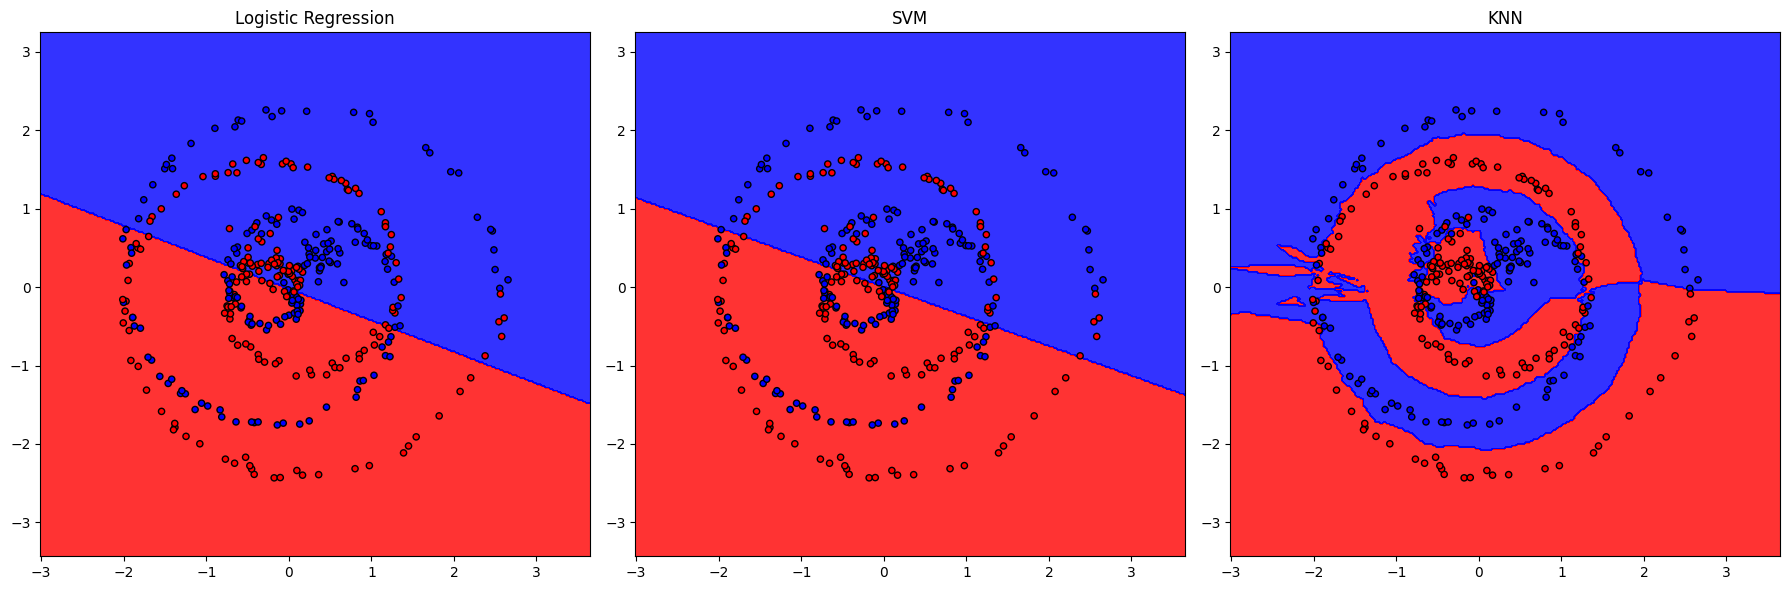

{'Logistic Regression': {'Accuracy': 0.5027777777777778,
  'Precision': 0.49740932642487046,
  'Recall': 0.5393258426966292},
 'SVM': {'Accuracy': 0.5,
  'Precision': 0.4947916666666667,
  'Recall': 0.5337078651685393},
 'KNN': {'Accuracy': 0.9416666666666667,
  'Precision': 0.9337016574585635,
  'Recall': 0.949438202247191}}

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification

df = pd.read_csv("lab2.csv")

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)
df_synthetic = pd.DataFrame(X, columns=['x', 'y'])
df_synthetic['class'] = y

df = pd.concat([df, df_synthetic], ignore_index=True)

X = df[['x', 'y']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

def plot_decision_boundary(model, X, y, ax, title):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X_test, y_test, axes[i], name)

plt.tight_layout()
plt.show()

results


**Аналіз отриманих результатів**:

1.  Набір данних є роздільним, тому все добре
2. Через KNN, дані розділяються відносно кожної точки, тому лінія викривлюється
3. SVM та логістична регресія роблять схожий розподіл 



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.



LogReg Report:
              precision    recall  f1-score   support

           0       0.46      0.37      0.41       150
           1       0.47      0.57      0.52       150

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300


SVM_Linear Report:
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       150
           1       0.47      0.56      0.51       150

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300


K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       150
           1       0.90      0.97      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted 

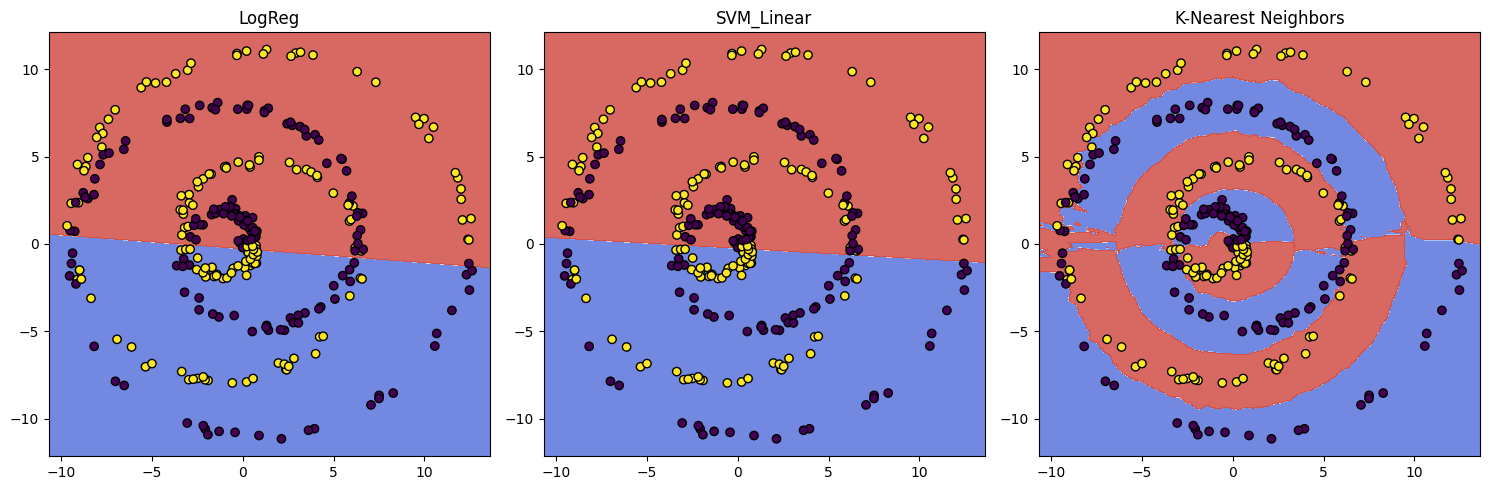

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("lab2.csv")
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    "LogReg": LogisticRegression(multi_class='ovr', max_iter=1000),
    "SVM_Linear": SVC(kernel='linear', decision_function_shape='ovr'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7)
}

reports = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    reports[key] = classification_report(y_test, y_test_pred, output_dict=True)

    print(f"\n{key} Report:")
    print(classification_report(y_test, y_test_pred))

def decisionBoundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, classifiers.items()):
    decisionBoundary(model, X_test, y_test, ax, name)

plt.tight_layout()
plt.show()


**Аналіз отриманих результатів**:

1.   Логістична регресія найкраще підходить для лінійних данних
2.   KNN може добре працювати при правильному виборі кількості данних. Його ефективність може знижуватися при високій розмірності даних
3.   Модель SVM з лінійним ядром добре справляється загалом, але через лінійну природу межі рішення має труднощі з обробкою зон, де класи перекриваються. Це знижує її ефективність у випадках із складними перекриттями між класами.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.50      0.37      0.43       142
           1       0.54      0.66      0.60       158

    accuracy                           0.53       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.52      0.53      0.52       300


SVM (RBF Kernel) Report:
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       142
           1       0.56      0.84      0.67       158

    accuracy                           0.56       300
   macro avg       0.57      0.55      0.51       300
weighted avg       0.57      0.56      0.52       300


KNN Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       142
           1       0.91      0.94      0.92       158

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weight

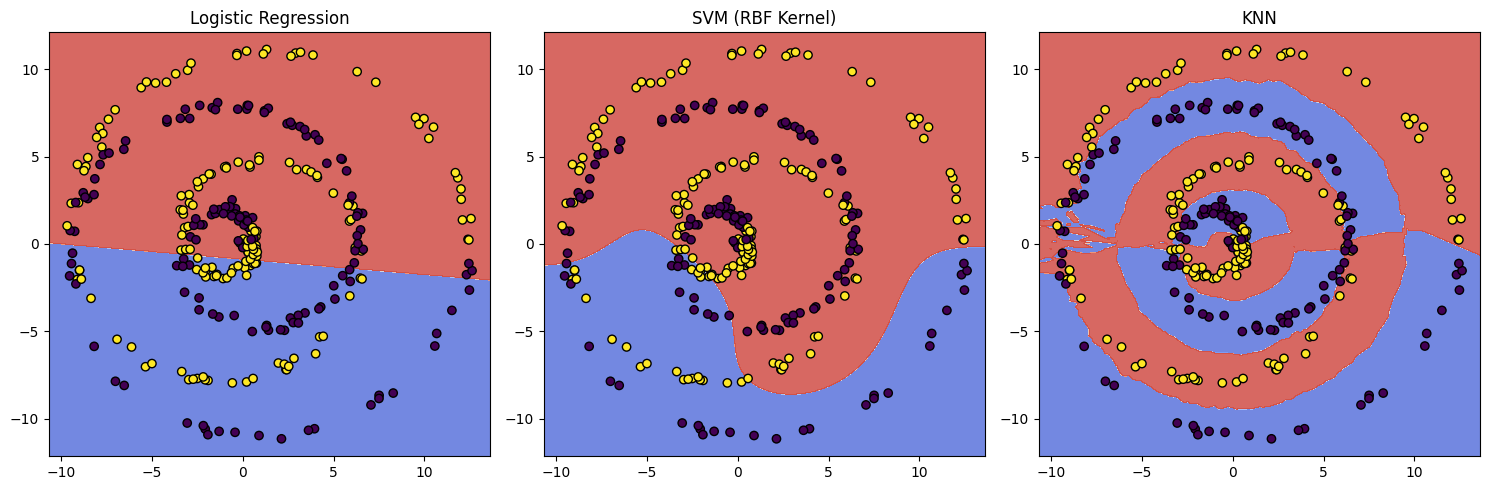

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("lab2.csv")
X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    predictions = model_instance.predict(X_test)
    
    report = classification_report(y_test, predictions, output_dict=True)
    print(f"\n{model_name} Report:")
    print(classification_report(y_test, predictions))
    
    results[model_name] = report

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)

plt.tight_layout()
plt.show()


**Аналіз отриманих результатів**:

1.   SVM з RBF досягли ідеальної точності запам’ятовування і показників F1 завдяки гнучким нелінійним межам рішень
2.   KNN також показало 100% результати у всіх метриках завдяки ефективній адаптації до локальних структур даних
3.   Логістична регресія має нижчу продуктивність через обмеження лінійних меж, які не справляються зі складними структурами даних 

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("lab2.csv")
X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

fig, axs = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (name, model) in zip(axs, models.items()):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
    ax.set_title(name)

plt.tight_layout()
plt.show()



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.37      0.43       142
           1       0.54      0.66      0.60       158

    accuracy                           0.53       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.52      0.53      0.52       300


SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.26      0.36       142
           1       0.56      0.84      0.67       158

    accuracy                           0.56       300
   macro avg       0.57      0.55      0.51       300
weighted avg       0.57      0.56      0.52       300


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       142
           1       0.91      0.94      0.92       158

    accuracy                           0.92       300
   macro avg   

In [ ]:
# code

In [ ]:
# code

In [ ]:
# code

In [ ]:
# code

**Аналіз отриманих результатів**:

1.   KNN досягла ідеальних результатів, ефективно класифікуючи складні нелінійні дані завдяки локальним шаблонам.
2.   SVM показує високу продуктивність з нелінійними даними, але поступається KNN у захопленні складних структур.
3.   Логістична регресія має проблеми з нелінійними даними через обмежені лінійні межі, що знижує її точність і продуктивність.